In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

## Import data

In [4]:
data2 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='2MassCurve', skiprows=4, usecols=range(6), index_col='Year')
data2.describe()

,A,B,C,D,E
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1094.588235,1059.058824,974.529412,972.117647,1093.058824
std,154.527125,161.344922,214.418142,154.720669,185.289460
min,801.000000,751.000000,710.000000,683.000000,771.000000
25%,1010.000000,978.000000,825.000000,875.000000,967.000000
50%,1140.000000,1056.000000,933.000000,981.000000,1135.000000
75%,1170.000000,1161.000000,1058.000000,1056.000000,1190.000000
max,1411.000000,1353.000000,1584.000000,1286.000000,1483.000000


## The double-mass curve

In [5]:
data2['AVG'] = data2.mean(axis=1)
data2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010,1161,780,949,1135,1007.0
1971,1005,978,1041,784,970,955.6
1972,1067,1226,1027,1067,1158,1109.0
1973,1051,880,825,1014,1022,958.4
1974,801,1146,933,923,821,924.8


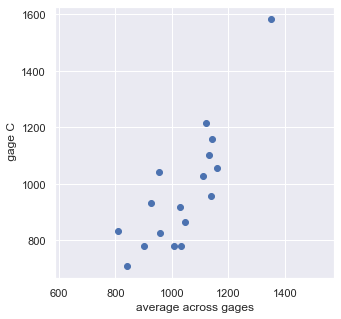

In [9]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.scatter(data2.AVG, data2.C)
plt.xlabel('average across gages')
plt.ylabel(' gage C');

In [10]:
data2.cumsum()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010.0,1161.0,780.0,949.0,1135.0,1007.0
1971,2015.0,2139.0,1821.0,1733.0,2105.0,1962.6
1972,3082.0,3365.0,2848.0,2800.0,3263.0,3071.6
1973,4133.0,4245.0,3673.0,3814.0,4285.0,4030.0
1974,4934.0,5391.0,4606.0,4737.0,5106.0,4954.8
1975,6345.0,6744.0,6190.0,5667.0,6589.0,6307.0
1976,7567.0,7762.0,7405.0,6648.0,7763.0,7429.0
1977,8579.0,8513.0,8237.0,7331.0,8534.0,8238.8
1978,9732.0,9572.0,9155.0,8155.0,9722.0,9267.2


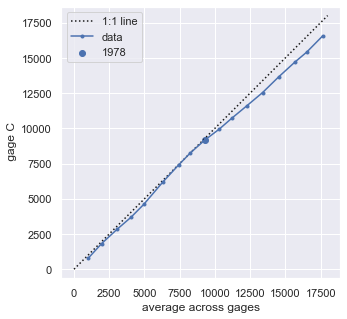

In [25]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 18000), (0, 18000), ':k', label='1:1 line')
plt.plot(data2.AVG.cumsum(), data2.C.cumsum(), '.-', label='data')
plt.scatter(data2.AVG.cumsum().loc[1978], data2.C.cumsum().loc[1978], label='1978')
plt.xlabel('average across gages')
plt.ylabel(' gage C')
plt.legend();

## Correct the series

In [16]:
def linear_reg(x, m):
    """Linear regression with intercept 0
        y = m * x
    """
    
    y = m * x
    
    return y

In [17]:
from scipy.optimize import curve_fit

### Slope of the first regression

In [18]:
# define x and y in the regression
x = data2.loc[:1978, 'AVG']
y = data2.loc[:1978, 'C']

In [19]:
# cumulative series
x = x.cumsum()
y = y.cumsum()

In [24]:
m1 = curve_fit(linear_reg, x, y)[0][0]
m1

0.9791616733162692

### Slope of the second regression

In [26]:
m2 = curve_fit(linear_reg, data2.loc[1978:, 'AVG'].cumsum(), data2.loc[1978:, 'C'].cumsum())[0][0]
m2

0.8658012243553987

### Correct the data

In [27]:
# correction factor
factor = m1 / m2
factor

1.1309312643271774

In [28]:
# copy of the original series
data2['C_'] = data2['C'].copy()
data2.head()

,A,B,C,D,E,AVG,C_
Year,,,,,,,
1970,1010,1161,780,949,1135,1007.0,780
1971,1005,978,1041,784,970,955.6,1041
1972,1067,1226,1027,1067,1158,1109.0,1027
1973,1051,880,825,1014,1022,958.4,825
1974,801,1146,933,923,821,924.8,933


In [29]:
# correct the second part of C_
data2.loc[1979:, 'C_'] *= factor

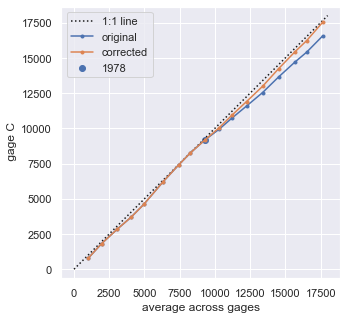

In [32]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 18000), (0, 18000), ':k', label='1:1 line')
plt.plot(data2.AVG.cumsum(), data2.C.cumsum(), '.-', label='original')
plt.plot(data2.AVG.cumsum(), data2.C_.cumsum(), '.-', label='corrected')
plt.scatter(data2.AVG.cumsum().loc[1978], data2.C_.cumsum().loc[1978], label='1978')
plt.xlabel('average across gages')
plt.ylabel(' gage C')
plt.legend();

plt.savefig('../output/Ex2_double-mass curve', dpi=300)

In [33]:
data2.head()

,A,B,C,D,E,AVG,C_
Year,,,,,,,
1970,1010,1161,780,949,1135,1007.0,780.0
1971,1005,978,1041,784,970,955.6,1041.0
1972,1067,1226,1027,1067,1158,1109.0,1027.0
1973,1051,880,825,1014,1022,958.4,825.0
1974,801,1146,933,923,821,924.8,933.0


In [37]:
data2_ = data2[['A', 'B', 'C_', 'D', 'E']]
data2_.columns = ['A', 'B', 'C', 'D', 'E']
data2_.to_csv('../output/Ex2_corrected series.csv')